## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## read csv

In [10]:
df=pd.read_csv('data.csv')

In [ ]:
df['mul']=df['Year']*df['highway MPG']

0        52286
1        56308
2        56308
3        56308
4        56308
         ...  
11909    46276
11910    46276
11911    46276
11912    46299
11913    52156
Length: 11914, dtype: int64

In [12]:
df.info

<bound method DataFrame.info of           Make       Model  Year                Engine Fuel Type  Engine HP  \
0          BMW  1 Series M  2011     premium unleaded (required)      335.0   
1          BMW    1 Series  2011     premium unleaded (required)      300.0   
2          BMW    1 Series  2011     premium unleaded (required)      300.0   
3          BMW    1 Series  2011     premium unleaded (required)      230.0   
4          BMW    1 Series  2011     premium unleaded (required)      230.0   
...        ...         ...   ...                             ...        ...   
11909    Acura         ZDX  2012     premium unleaded (required)      300.0   
11910    Acura         ZDX  2012     premium unleaded (required)      300.0   
11911    Acura         ZDX  2012     premium unleaded (required)      300.0   
11912    Acura         ZDX  2013  premium unleaded (recommended)      300.0   
11913  Lincoln      Zephyr  2006                regular unleaded      221.0   

       Engine Cylin

## No of rows and colums

In [5]:
df.shape

(11914, 16)

## check for null

In [28]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

## Column info

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

## drop columns

In [ ]:
df=df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity','Number of Doors', 'Vehicle Size'], axis =1 )

## shape

In [14]:
df.shape

(11914, 10)

## Rename columns

In [54]:
df=df.rename(columns={"Engine HP": "HP", "Engine Cylinder": "Cylinder", "Transmission Type": "T Types"})

## Data Types

In [17]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object

## Find Duplicates

In [20]:
duplicate_row_df=df[df.duplicated()]
print(duplicate_row_df)

         Make     Model  Year  Engine HP  Engine Cylinders Transmission Type  \
14        BMW  1 Series  2013      230.0               6.0            MANUAL   
18       Audi       100  1992      172.0               6.0            MANUAL   
20       Audi       100  1992      172.0               6.0            MANUAL   
24       Audi       100  1993      172.0               6.0            MANUAL   
25       Audi       100  1993      172.0               6.0            MANUAL   
...       ...       ...   ...        ...               ...               ...   
11481  Suzuki      X-90  1998       95.0               4.0            MANUAL   
11603   Volvo      XC60  2017      302.0               4.0         AUTOMATIC   
11604   Volvo      XC60  2017      240.0               4.0         AUTOMATIC   
11708  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   
11717  Suzuki       XL7  2008      252.0               6.0         AUTOMATIC   

           Driven_Wheels  highway MPG  

## Delete duplicates

In [22]:
df=df.drop_duplicates()

## count non null counts

In [30]:
df.count()

Make                 10827
Model                10827
Year                 10827
Engine HP            10827
Engine Cylinders     10827
Transmission Type    10827
Driven_Wheels        10827
highway MPG          10827
city mpg             10827
MSRP                 10827
dtype: int64

## drop tuples with null values

In [14]:
df=df.dropna()

## find IQR

In [41]:
arr=df['Year']
Q1= arr.quantile(0.25)
Q2= arr.quantile(0.75)
IQR=Q2-Q1
print(IQR)

9.0


## Find outliers

<Axes: xlabel='MSRP'>

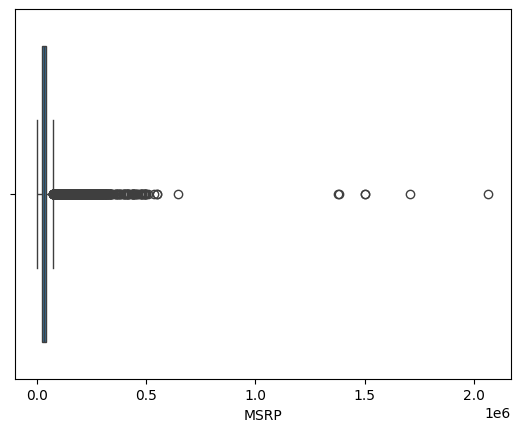

In [49]:
sns.boxplot(x=df['MSRP'])


## Bar Graph

Text(0.5, 0, 'Make')

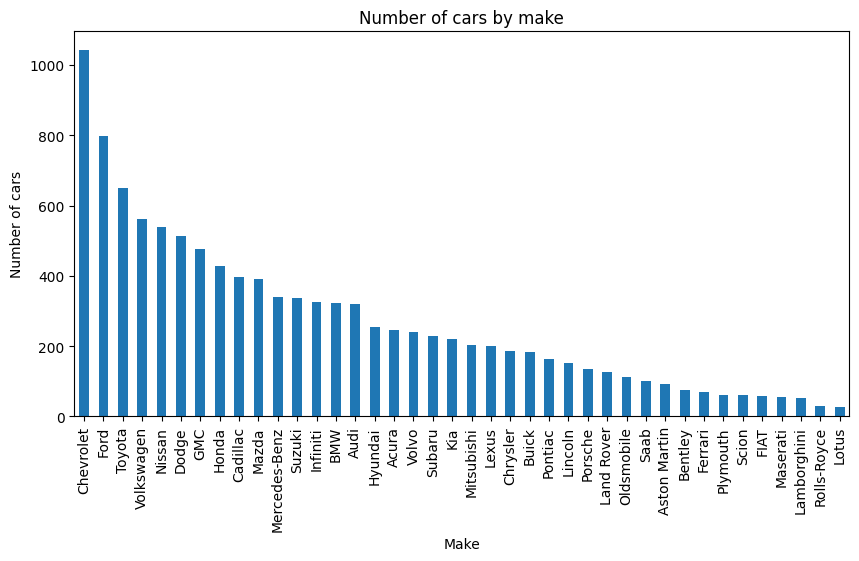

In [51]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

## Heat Map

,Year,HP,Engine Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Engine Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
MSRP,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


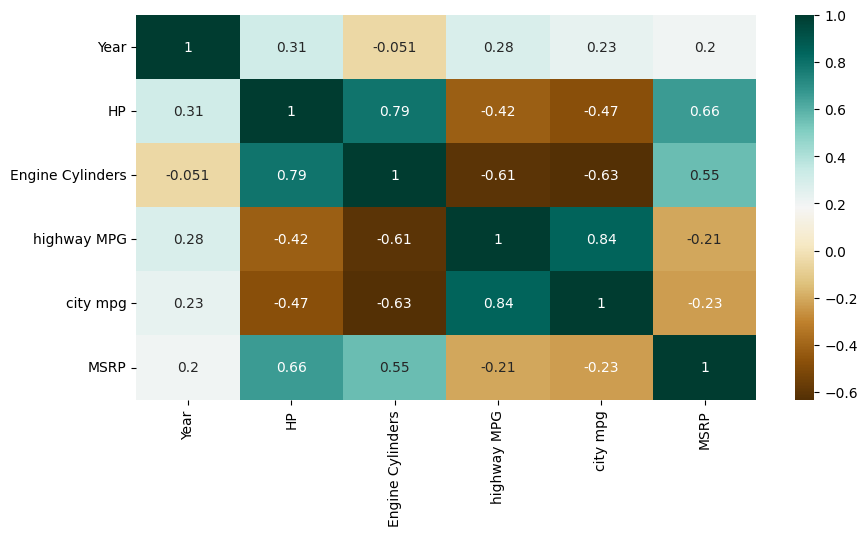

In [59]:
plt.figure(figsize=(10,5))
c=df.corr(numeric_only=True)
sns.heatmap(c,cmap="BrBG",annot=True)
c